# Teorema della scomposizione della devianza {#sec-theo-deviance-decomposition}

**Preparazione del Notebook**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")

In [13]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "regression_deviance_decomposition"))
rng: np.random.Generator = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

Il teorema della scomposizione della devianza nel modello di regressione lineare ci aiuta a comprendere quanto bene il modello si adatta ai dati. Esso scompone la variazione totale dei dati in componenti attribuibili all'effetto del modello e alla variazione residua non spiegata dal modello. 

## Formulazione del Teorema

Dato un set di dati $y_1, y_2, \dots, y_n$, dove $y_i$ rappresenta l'i-esimo valore della variabile dipendente, e $\bar{y}$ è la media campionaria di $y$, la devianza totale (o variazione totale) dei dati può essere scomposta nel seguente modo:

1. **Devianza Totale (VT)**: Misura la dispersione totale dei dati intorno alla loro media.
   $$
   DT = \sum_{i=1}^n (y_i - \bar{y})^2
   $$

2. **Devianza Spiegata (VS)**: Misura quanto della variazione totale è spiegata dal modello di regressione.

   $$
   DS = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
   $$

   dove $\hat{y}_i$ è il valore predetto dalla regressione per l'i-esimo osservazione.

3. **Devianza Residua (VR)**: Misura la variazione dei dati che il modello non riesce a spiegare.
   $$
   DR = \sum_{i=1}^n (y_i - \hat{y}_i)^2
   $$

### Teorema di Scomposizione della Devianza

Il teorema afferma che la variazione totale $DT$ è uguale alla somma della variazione spiegata $DS$ e della variazione residua $DR$:

$$
DT = DS + DR
$$

### Dimostrazione

La dimostrazione di questa identità si basa sul principio di ortogonalità dei residui e delle stime. I residui $y_i - \hat{y}_i$ sono ortogonali alle predizioni $\hat{y}_i - \bar{y}$ nel contesto della regressione lineare. Matematicamente, ciò è espresso da:

$$
\sum_{i=1}^n (\hat{y}_i - \bar{y})(y_i - \hat{y}_i) = 0
$$

Utilizzando l'ortogonalità, possiamo scrivere la variazione totale come segue:

$$
\begin{align*}
DT &= \sum_{i=1}^n (y_i - \bar{y})^2 \\
   &= \sum_{i=1}^n [(y_i - \hat{y}_i) + (\hat{y}_i - \bar{y})]^2 \\
   &= \sum_{i=1}^n (y_i - \hat{y}_i)^2 + 2\sum_{i=1}^n (y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) + \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 \\
   &= DR + 2 \cdot 0 + DS \\
   &= DR + DS
\end{align*}
$$

Questa dimostrazione chiarisce che la variazione totale è esattamente uguale alla somma della devianza spiegata dal modello e quella non spiegata (residua). 

### Applicazione

Applichiamo ora il teorema di scomposizione della devianza ai dati in esame. Usando `pg.linear_regression(x, y)` calcoliamo il coefficiente di determinazione.

Consideriamo i dati forniti dal dataset `kidiq`.

In [5]:
kidiq = pd.read_stata("../../data/kidiq.dta")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


Ci concentreremo sulla relazione lineare tra l'intelligenza del bambino e l'intelligenza della madre.

Rinominiamo le due variabili di interesse.

In [6]:
x = kidiq["mom_iq"]
y = kidiq["kid_score"]

Un diagramma a dispersione evidenzia un'associazione tra le due variabili in esame, che può essere ragionevolmente approssimata da una retta. Tuttavia, il grafico suggerisce anche che la relazione tra le variabili non sia particolarmente forte.

In questo contesto, ci poniamo il duplice obiettivo di individuare la retta che meglio si adatta ai dati del diagramma e di quantificare la bontà di questo adattamento. In altre parole, vogliamo valutare quanto, in media, i punti del diagramma si discostano dalla retta individuata.

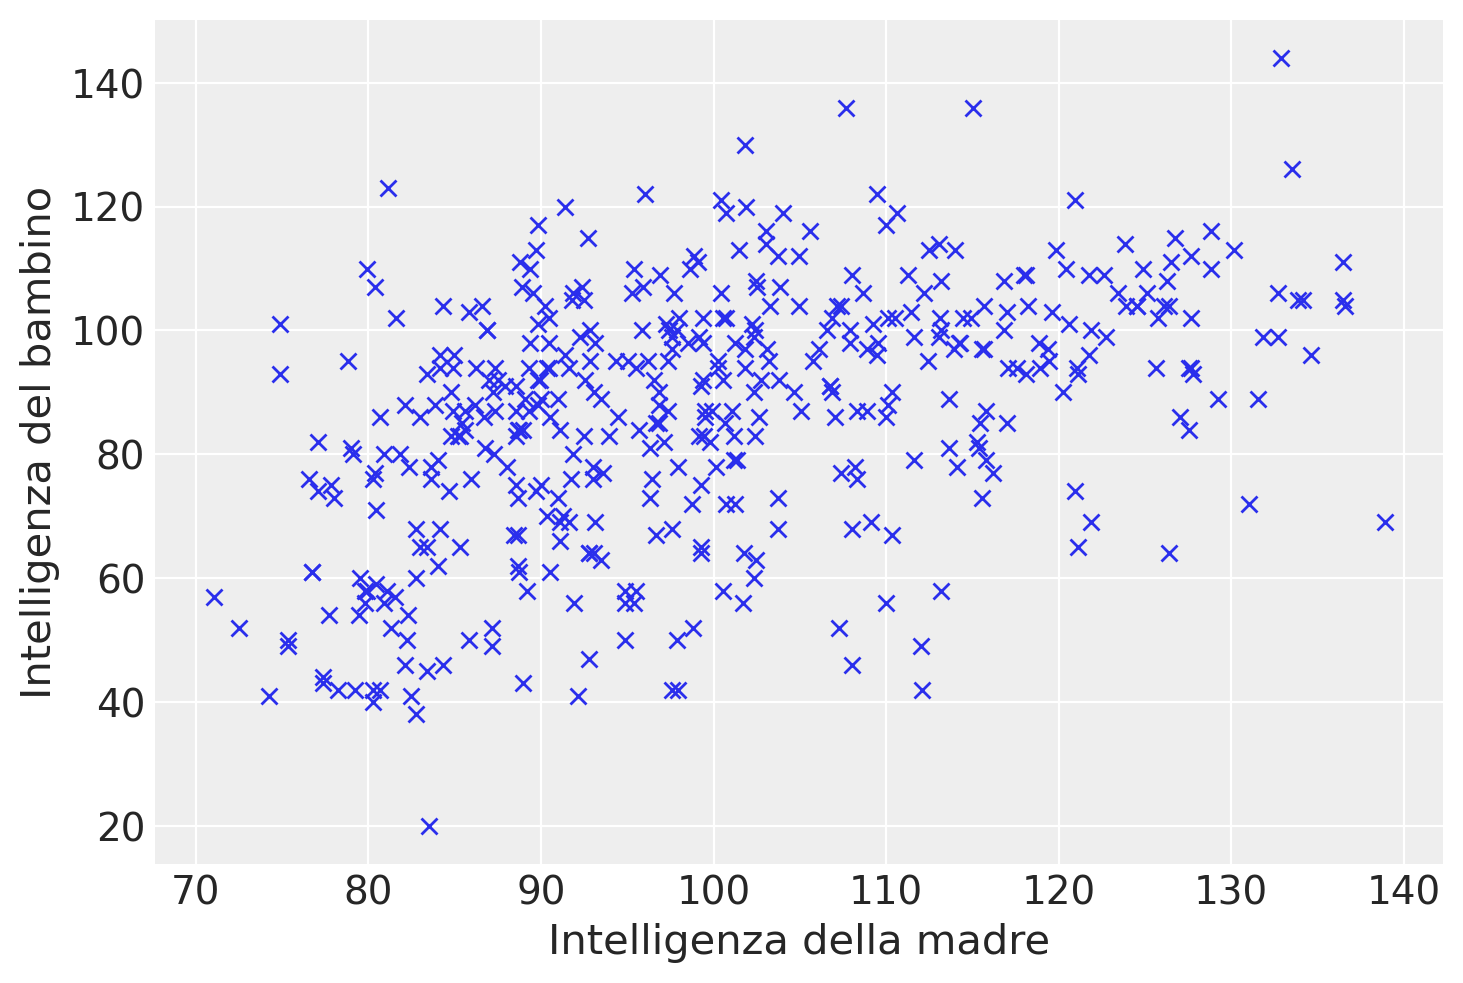

In [7]:
plt.plot(x, y, "x")
plt.xlabel("Intelligenza della madre")
_ = plt.ylabel("Intelligenza del bambino")

Calcoliamo i coefficienti del modello 

$$
y_i = \beta_0 + \beta_1 x_i + e_i
$$

con il metodo della massima verosimiglianza. A questo scopo usiamo la funzione `linear_regression()` del pacchetto `pingouin`.

In [8]:
lm = pg.linear_regression(x, y)
lm.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,25.80,5.92,4.36,0.0,0.2,0.2,14.17,37.43
1,mom_iq,0.61,0.06,10.42,0.0,0.2,0.2,0.49,0.72


In [9]:
r_squared = lm["r2"][0] # R-squared del modello
print(r_squared)

0.20095123075855126


Calcoliamo la devianza totale.

In [10]:
DT = np.sum((y - np.mean(y))**2)
print(DT)

180386.15668202768


Calcoliamo la devianza spiegata.

In [19]:
DS = np.sum((yhat - np.mean(y)) ** 2)
print(DS)

36248.82019705826


Calcoliamo la devianza residua.

In [20]:
DR = np.sum((y - yhat) ** 2)
print(DR)

144137.33648496936


La devianza totale è la somma della devianza spiegata e della devianza residua.

In [21]:
DS + DR

180386.15668202762

Il coefficiente di determinazione è il rapporto tra la devianza spiegata e la devianza totale.

In [22]:
Rsq = DS / DT
print(Rsq)

0.2009512307585509


Ciò significa che solo il 20% della devianza totale del QI dei bambini può essere predetta dal QI delle madri in base ad un modello lineare in questo campione.